In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [393]:
df=pd.read_csv('Customer-Churn-Records[1].csv')

In [394]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [395]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [396]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [397]:
df.shape

(10000, 18)

In [398]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 10000
Number of columns 18


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [400]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [401]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [402]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [403]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [404]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [405]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [406]:
df=pd.get_dummies(df,drop_first=True)

In [407]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


In [408]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

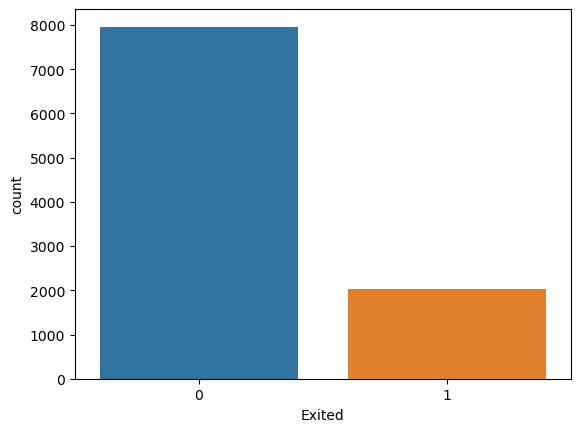

In [409]:
sns.countplot(df['Exited'])

In [410]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [411]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,300,False,False,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,5,771,False,False,True,False,True,False
9997,709,36,7,0.00,1,0,1,42085.58,1,3,564,False,False,False,False,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,2,339,True,False,True,True,False,False


In [412]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [413]:
from sklearn.model_selection import train_test_split

In [414]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [415]:
from sklearn.preprocessing import StandardScaler

In [416]:
sc=StandardScaler()

In [417]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [418]:
x_train

array([[ 0.6034876 , -0.37214252, -1.04099191, ...,  1.71038507,
        -0.57677292, -0.57465595],
       [ 0.96546899, -0.94067878, -1.38698009, ..., -0.58466366,
         1.73378459, -0.57465595],
       [ 1.26539642,  2.37578275, -1.04099191, ..., -0.58466366,
        -0.57677292,  1.74017165],
       ...,
       [-0.29629469, -1.22494691,  1.38092529, ..., -0.58466366,
         1.73378459, -0.57465595],
       [-0.60656445, -1.03543482, -0.0030274 , ..., -0.58466366,
        -0.57677292, -0.57465595],
       [ 0.24150622,  0.57541792,  0.68894895, ..., -0.58466366,
        -0.57677292,  1.74017165]])

In [419]:
x_test

array([[-0.44108724, -0.08787439,  1.03493712, ..., -0.58466366,
        -0.57677292,  1.74017165],
       [ 0.36561412, -0.18263043,  1.38092529, ..., -0.58466366,
        -0.57677292, -0.57465595],
       [ 0.01397507,  0.29114979, -0.34901557, ...,  1.71038507,
        -0.57677292, -0.57465595],
       ...,
       [-0.23424074,  0.57541792,  0.34296078, ..., -0.58466366,
         1.73378459, -0.57465595],
       [ 1.30676572, -0.84592274, -0.34901557, ..., -0.58466366,
        -0.57677292, -0.57465595],
       [-0.23424074,  0.00688166,  0.34296078, ..., -0.58466366,
         1.73378459, -0.57465595]])

# LogisticRegression

In [420]:
from sklearn.linear_model import LogisticRegression

In [421]:
log=LogisticRegression()

In [422]:
log.fit(x_train,y_train)

LogisticRegression()

In [423]:
y_pred1=log.predict(x_test)

In [424]:
from sklearn.metrics import accuracy_score

In [425]:
accuracy_score(y_test,y_pred1)

0.9985

In [426]:
from sklearn.metrics import precision_score,recall_score,recall_score,f1_score

In [427]:
precision_score(y_test,y_pred1)

0.9975429975429976

In [428]:
recall_score(y_test,y_pred1)

0.9950980392156863

In [429]:
f1_score(y_test,y_pred1)

0.9963190184049079

In [430]:
from imblearn.over_sampling import SMOTE

In [431]:
from imblearn import under_sampling, over_sampling

In [432]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [433]:
y_res.value_counts()

Exited
1    7962
0    7962
Name: count, dtype: int64

# svc

In [434]:
from sklearn import svm

In [435]:
svm=svm.SVC()

In [436]:
svm.fit(x_train,y_train)

SVC()

In [437]:
y_pred2=svm.predict(x_test)

In [438]:
accuracy_score(y_test,y_pred2)

0.9985

In [439]:
precision_score(y_test,y_pred2)

0.9975429975429976

# KNeighbours classifiers

In [440]:
from sklearn.neighbors import KNeighborsClassifier

In [441]:
knn = KNeighborsClassifier()

In [442]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [443]:
y_pred3=knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [444]:
accuracy_score(y_test,y_pred3)

0.992

In [445]:
precision_score(y_test,y_pred3)

0.9974619289340102

In [446]:
from sklearn.tree import DecisionTreeClassifier

In [447]:
dt=DecisionTreeClassifier()

In [448]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [449]:
y_pred4=dt.predict(x_test)

In [450]:
accuracy_score(y_test,y_pred4)

0.997

In [451]:
precision_score(y_test,y_pred4)

0.9950738916256158

# Random Forest Classifier

In [452]:
from sklearn.ensemble import RandomForestClassifier

In [453]:
rf=RandomForestClassifier()

In [454]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [455]:
y_pred5 =rf.predict(x_test)

In [456]:
accuracy_score(y_test,y_pred5)

0.9985

In [457]:
precision_score(y_test,y_pred5)

0.9975429975429976

# Gradient boosting classifier

In [458]:
from sklearn.ensemble import GradientBoostingClassifier

In [459]:
gbc = GradientBoostingClassifier()

In [460]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [461]:
y_pred6 = gbc.predict(x_test)

In [462]:
accuracy_score(y_test,y_pred6)

0.998

In [463]:
precision_score(y_test,y_pred6)

0.9950980392156863

In [464]:
final_data=DataFrame({'Models':['LR','SVC','KNN','DT','RF','GRC'],
                     'ACC':[accuracy_score(y_test,y_pred1),
                           accuracy_score(y_test,y_pred2),
                           accuracy_score(y_test,y_pred3),
                           accuracy_score(y_test,y_pred4),
                           accuracy_score(y_test,y_pred5),
                           accuracy_score(y_test,y_pred6)]})

In [465]:
final_data

,Models,ACC
0,LR,0.9985
1,SVC,0.9985
2,KNN,0.9920
3,DT,0.9970
4,RF,0.9985
5,GRC,0.9980


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

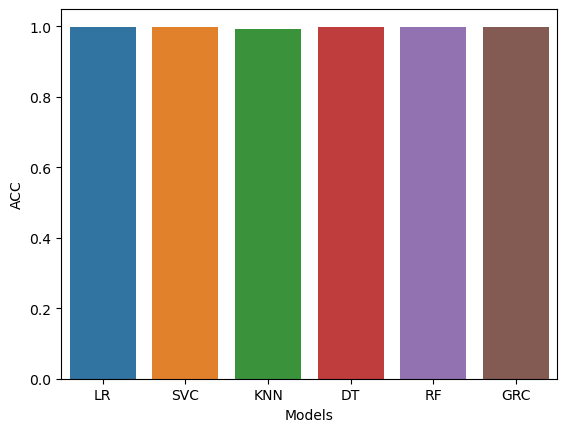

In [466]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [467]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GRC'],
                     'ACC':[accuracy_score(y_test,y_pred1),
                           accuracy_score(y_test,y_pred2),
                           accuracy_score(y_test,y_pred3),
                           accuracy_score(y_test,y_pred4),
                           accuracy_score(y_test,y_pred5),
                           accuracy_score(y_test,y_pred6)]})

In [468]:
final_data

,Models,ACC
0,LR,0.9985
1,SVC,0.9985
2,KNN,0.9920
3,DT,0.9970
4,RF,0.9985
5,GRC,0.9980


In [469]:
# Access the 'Gender' column
df['Gender_Male'].value_counts()

Gender_Male
True     5457
False    4543
Name: count, dtype: int64

In [470]:
print(df.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')


In [471]:
df['Geography_Spain'].value_counts()

Geography_Spain
False    7523
True     2477
Name: count, dtype: int64

In [472]:
x_test.shape

(2000, 17)

In [473]:
y_train.shape

(8000,)

In [474]:
x_train.shape

(8000, 17)